In [24]:
from torchview import draw_graph
import graphviz
# graphviz.set_jupyter_format('png')
from torchviz import make_dot, make_dot_from_trace

In [25]:
from cwvae import CWVAE

In [26]:
import numpy as np
import argparse
import os
import ruamel.yaml as yaml
import torch
import pathlib
import sys
from tqdm import tqdm

# from cwvae import build_model
# from loggers.summary import Summary
# from loggers.checkpoint import Checkpoint
from data_loader import *
import tools
from cwvae import CWVAE
from datetime import datetime
import pytz
from prettytable import PrettyTable

In [27]:
parser = argparse.ArgumentParser()
# args, remaining = parser.parse_known_args()
rootdir = pathlib.Path('~/codegit/cwvae-torch').expanduser()
configs = yaml.safe_load((rootdir / 'configs.yml').read_text())

defaults = {}
for name in ['defaults', 'local_mmnist']:
    defaults.update(configs[name])

for key, value in sorted(defaults.items(), key=lambda x: x[0]):
    arg_type = tools.args_type(value)
    parser.add_argument(f'--{key}', type=arg_type, default=arg_type(value))
# configs = parser.parse_args()

In [28]:
from collections import namedtuple

configs = namedtuple("configs", defaults.keys())(*defaults.values())

In [29]:
model = CWVAE(configs).to(configs.device)

/Users/intuinno/anaconda3/envs/cwvae/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [30]:
x = torch.randn(5,100,64,64,1)


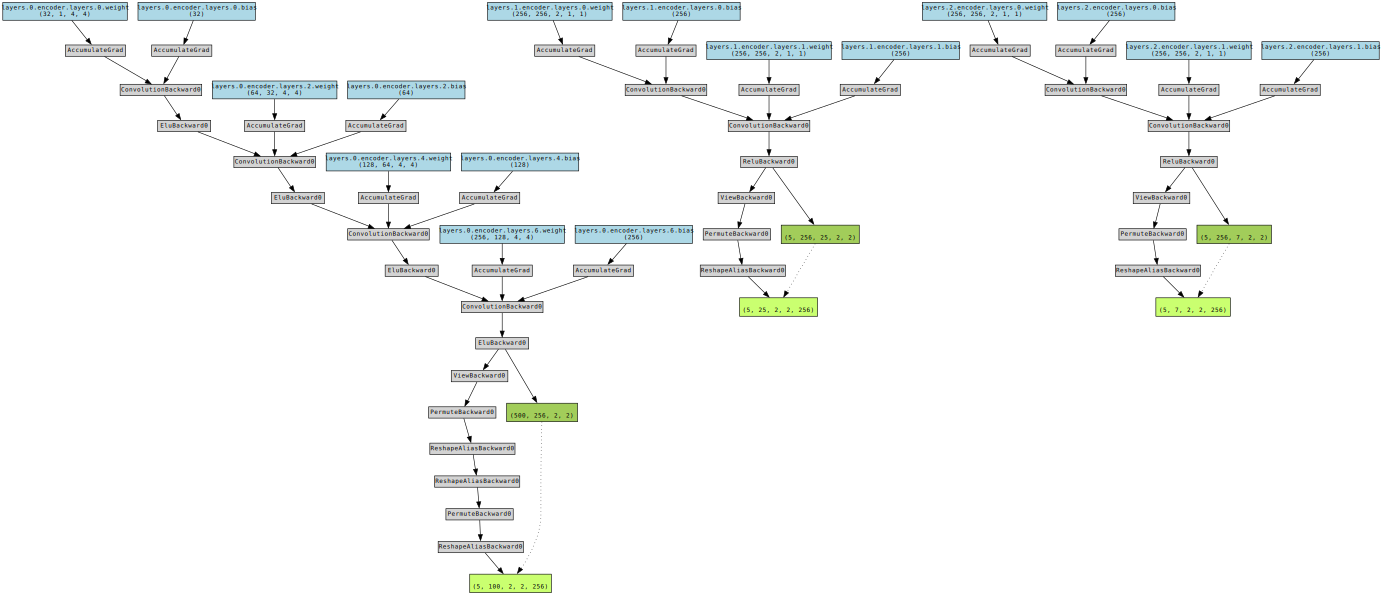

In [31]:
b, _ = model.hierarchical_encode(x)
make_dot(tuple((b[0], b[1], b[2])), params=dict(model.named_parameters()))

In [32]:
posteriors, priors, kl_losses, kl_values, feats = model.hierarchical_observe(b)

c = kl_losses

make_dot(tuple((c[0], c[1], c[2])), params=dict(model.named_parameters()))

In [ ]:
def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [ ]:
count_parameters(model)

In [ ]:
a = model.named_parameters()

In [ ]:
next(a)